# **Giới thiệu về Heart Disease**



**1.   Hiện trạng vấn đề:**

Hiện nay, số lượng các bệnh lý liên quan đến tim (heart disease) ngày càng gia tăng không phân biệt về giới tính hay lứa tuổi. Theo số liệu của WHO, bệnh tim là nguyên nhân gây tử vong lớn nhất thế giới. Trong đó, bệnh tim thiếu máu cục bộ chiếm 16% và đột quỵ chiếm 11% số ca tử vong trên toàn cầu.

Vì vậy, các nhà khoa học bắt đầu nghiên cứu các phương pháp hiện đại như Khai thác dữ liệu (data mining) và Học máy (machine learing) để dự đoán sớm khả năng bị bệnh tim dựa vào tiền sử sức khoẻ của bệnh nhân.

**2.   Phương pháp:**
Trong project này, chúng ta sẽ áp dụng các phương pháp máy học cơ bản để dự đoán xem một người có khả năng mắc bệnh tim hay không dựa trên tập dữ liệu về Bệnh tim Cleveland dataset từ UCI Machine Learning Repository và sử dụng các giải thuật máy học khác nhau để dự đoán xem bệnh nhân có khả năng bị bệnh tim hay không





# **Nội dung project**


## Setup

In [1]:
# Tải data
!gdown --id 1Kv_uzZGZv6bGgNU2XdyVgco7Md4QtGYa

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Kv_uzZGZv6bGgNU2XdyVgco7Md4QtGYa
To: /content/cleveland.csv
100% 10.9k/10.9k [00:00<00:00, 12.7MB/s]


In [19]:
# Tải các thư viện cần thiết cho project

!pip install -q numpy
!pip install -q pandas
!pip install -q seaborn
!pip install -q matplotlib
!pip install -q scikit-learn
!pip install -q xgboost

#**Data Analysis**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read data
df = pd.read_csv("/content/cleveland.csv", header=None)
df.columns = ["Age", "Sex", "CP", "Restbps", "Chol", "Fbs",
              "restecg", "thalack", "Exang", "Oldpeak", "Slope",
              "Ca", "Thal", "Target"]
df

,Age,Sex,CP,Restbps,Chol,Fbs,restecg,thalack,Exang,Oldpeak,Slope,Ca,Thal,Target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [4]:
df['Target'] = df.Target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['Thal'] = df.Thal.fillna(df.Thal.mean())
df['Ca'] = df.Ca.fillna(df.Ca.mean())

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

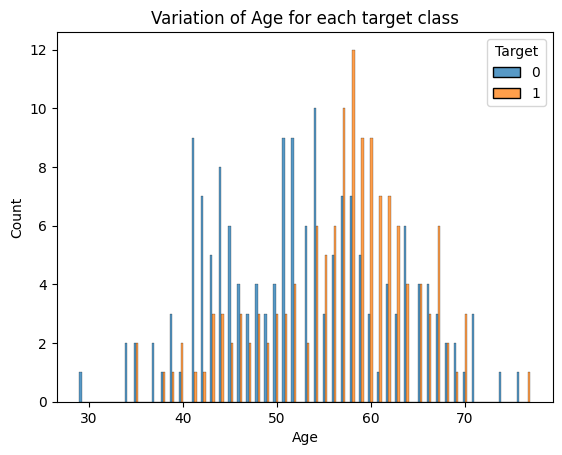

In [43]:
sns.histplot(x="Age", hue="Target", data=df, bins=100, multiple='dodge')
plt.title('Variation of Age for each target class')
plt

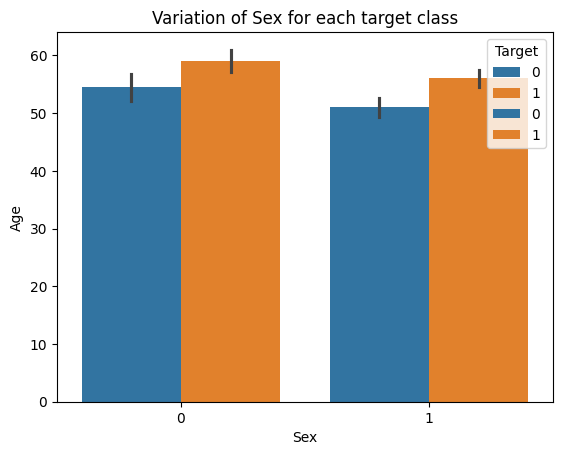

In [6]:
sns.barplot(x="Sex", y="Age", hue="Target", data=df[df['Sex'] == 0])
sns.barplot(x="Sex", y="Age", hue="Target", data=df[df['Sex'] == 1])

plt.title('Variation of Sex for each target class')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [8]:
KNN = KNeighborsClassifier(n_neighbors=5, weights='uniform', leaf_size=30, p=2, metric='minkowski')
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)

print(round(accuracy_score(y_train, KNN.predict(X_train)),2))
print(round(accuracy_score(y_test, y_pred), 2))

0.76
0.69


In [9]:
# Dùng SVM
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)

print('Accuracy for training set for SVM = {}'.format(round(accuracy_score(y_train, svm.predict(X_train)), 2)))
print('Accuracy for test set for SVM = {}'.format(round(accuracy_score(y_test, svm.predict(X_test)), 2)))

Accuracy for training set for SVM = 0.66
Accuracy for test set for SVM = 0.67


In [10]:
# Dùng naive bayes
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

print('Accuracy for training set for Naive Bayes = {}'.format(round(accuracy_score(y_train, nb.predict(X_train)), 2)))
print('Accuracy for test set for Naive Bayes = {}'.format(round(accuracy_score(y_test, nb.predict(X_test)), 2)))

Accuracy for training set for Naive Bayes = 0.85
Accuracy for test set for Naive Bayes = 0.84


In [11]:
# Dùng Decision tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2)
dt.fit(X_train, y_train)

print('Accuracy for training set for Decision Tree = {}'.format(round(accuracy_score(y_train, dt.predict(X_train)), 2)))
print('Accuracy for test set for Decision Tree = {}'.format(round(accuracy_score(y_test, dt.predict(X_test)), 2)))

Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decision Tree = 0.75


In [13]:
# Dùng Random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=2, n_estimators=10, random_state=42)
rf.fit(X_train, y_train)

print('Accuracy for training set for Random forest = {}'.format(round(accuracy_score(y_train, rf.predict(X_train)), 2)))
print('Accuracy for test set for Random forest = {}'.format(round(accuracy_score(y_test, rf.predict(X_test)), 2)))


Accuracy for training set for Random forest = 0.98
Accuracy for test set for Random forest = 0.8


In [14]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=50, learning_rate=  1)
ada.fit(X_train, y_train)

print('Accuracy for training set for AdaBoost = {}'.format(round(accuracy_score(y_train, ada.predict(X_train)), 2)))
print('Accuracy for test set for AdaBoost = {}'.format(round(accuracy_score(y_test, ada.predict(X_test)), 2)))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy for training set for AdaBoost = 0.91
Accuracy for test set for AdaBoost = 0.84


In [18]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=3, random_state=42, min_samples_split=2, subsample=1)
gb.fit(X_train, y_train)

print('Accuracy for training set for Gradient Boosting = {}'.format(round(accuracy_score(y_train, gb.predict(X_train)), 2)))
print('Accuracy for test set for Gradient Boosting = {}'.format(round(accuracy_score(y_test, gb.predict(X_test)), 2)))

Accuracy for training set for Gradient Boosting = 1.0
Accuracy for test set for Gradient Boosting = 0.84


In [23]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective="binary:logistic", n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)

print('Accuracy for training set for XGBoost = {}'.format(round(accuracy_score(y_train, xgb.predict(X_train)), 2)))
print('Accuracy for test set for XGBoost = {}'.format(round(accuracy_score(y_test, xgb.predict(X_test)), 2)))

Accuracy for training set for XGBoost = 1.0
Accuracy for test set for XGBoost = 0.87


In [28]:
# Stacking
from sklearn.ensemble import StackingClassifier

dtc =  DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
knn =  KNeighborsClassifier()
xgb = XGBClassifier(random_state=42)
gc = GradientBoostingClassifier(random_state=42)
svc = SVC(kernel = 'rbf', random_state=42)
ad = AdaBoostClassifier(random_state=42)

models = [('dtc', dtc), ('rfc', rfc), ('knn', knn), ('xgb', xgb), ('gc', gc), ('svc', svc), ('ad', ad)]

stack = StackingClassifier(estimators=models, final_estimator=xgb)
stack.fit(X_train, y_train)

print('Accuracy for training set for Stacking = {}'.format(round(accuracy_score(y_train, stack.predict(X_train)), 2)))
print('Accuracy for test set for Stacking = {}'.format(round(accuracy_score(y_test, stack.predict(X_test)), 2)))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Accuracy for training set for Stacking = 0.98
Accuracy for test set for Stacking = 0.89
